In [53]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [54]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [55]:
plt.ion()
plt.style.use('seaborn-colorblind')

In [56]:
conn = sqlite3.connect('sql/sql.db')
cursor = conn.cursor()

In [57]:
#Executar só uma vez a cada vez que abrir o colab
f = io.open('sql/trabalho.sql', 'r', encoding='ISO-8859-1')
sql = f.read()
cursor.executescript(sql)

OperationalError: table ANSWERS already exists

Modelo relacional
<img src="diagrama/diagrama.png">

In [58]:
def boostreap(p,n_size = 500):
    values = np.zeros(n_size)
    
    d = pd.DataFrame(p)
    
    for i in range(n_size):
        sample = d[0].sample(replace = True,n = len(p))
        values[i] = sample.mean()
        
    return values

In [74]:
def gerarB(selecionados,df,n_size=500):
    p = []
    for country in selecionados:
        pais = df[df["COUNTRYCODE"] == country]

        for x in range(pais.shape[0]):
            sample = pais.iloc[x]
            for _ in range(int(sample["TAMANHO"])):
                p.append(sample["VALUE"])

    b = boostreap(p,n_size=n_size)
    
    return b

In [59]:
query = """
Select *
FROM SIZE Natural JOIN ANSWERS NATURAL JOIN Country
where TIPO = SUBSET
"""

populacao = pd.read_sql_query(query,conn)
populacao

,COUNTRYCODE,TIPO,VALOR,SUBSET,QC,ANSWER,PERCENTAGE,NOTES,COUNTRY
0,0,LESBIAN,437,LESBIAN,b1_a,Very widespread,8,NULL,AT
1,0,LESBIAN,437,LESBIAN,b1_a,Fairly widespread,34,NULL,AT
2,0,LESBIAN,437,LESBIAN,b1_a,Fairly rare,45,NULL,AT
3,0,LESBIAN,437,LESBIAN,b1_a,Very rare,9,NULL,AT
4,0,LESBIAN,437,LESBIAN,b1_a,Don`t know,4,[0],AT
...,...,...,...,...,...,...,...,...,...
88190,11,TRANS,813,TRANS,fb2_9,Lesbian,1,[0],GB
88191,11,TRANS,813,TRANS,fb2_9,Gay,3,[0],GB
88192,11,TRANS,813,TRANS,fb2_9,Bisexual,1,[0],GB
88193,11,TRANS,813,TRANS,fb2_9,Mixed sexual orientation,3,NULL,GB


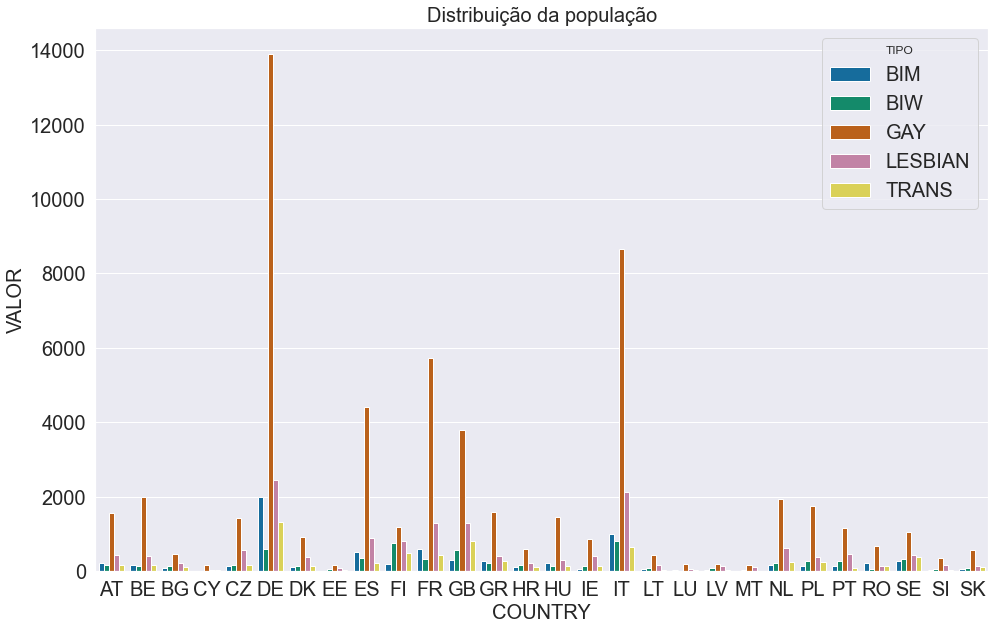

In [60]:
p = populacao.groupby(["COUNTRY","TIPO"]).mean()[["VALOR"]].reset_index()
sns.barplot(x = "COUNTRY", y = "VALOR", data = p, hue = "TIPO")
plt.title("Distribuição da população")
plt.show()

In [61]:
query = """
Select *
FROM IDH NATURAL JOIN Country
"""

idh = pd.read_sql_query(query,conn)
idh = idh.drop("COUNTRYCODE",1)
idh

,HDI,LEB,EYS,MYS,GNI,GNI_HDI,COUNTRY
0,923.0,80.2,18.7,12.7,44.025,11.0,DK
1,922.0,81.6,17.9,11.9,45.435,9.0,NL
2,916.0,80.9,16.5,13.1,43.919,11.0,DE
3,916.0,80.9,18.6,12.2,39.568,16.0,IE
4,907.0,80.7,16.2,13.1,39.267,9.0,GB
5,907.0,82.2,15.8,12.1,45.636,-1.0,SE
6,892.0,81.7,13.9,11.7,58.711,-11.0,LU
7,890.0,80.8,16.3,11.3,41.187,0.0,BE
8,888.0,82.2,16.0,11.1,38.056,4.0,FR
9,885.0,81.4,15.7,10.8,43.869,-5.0,AT


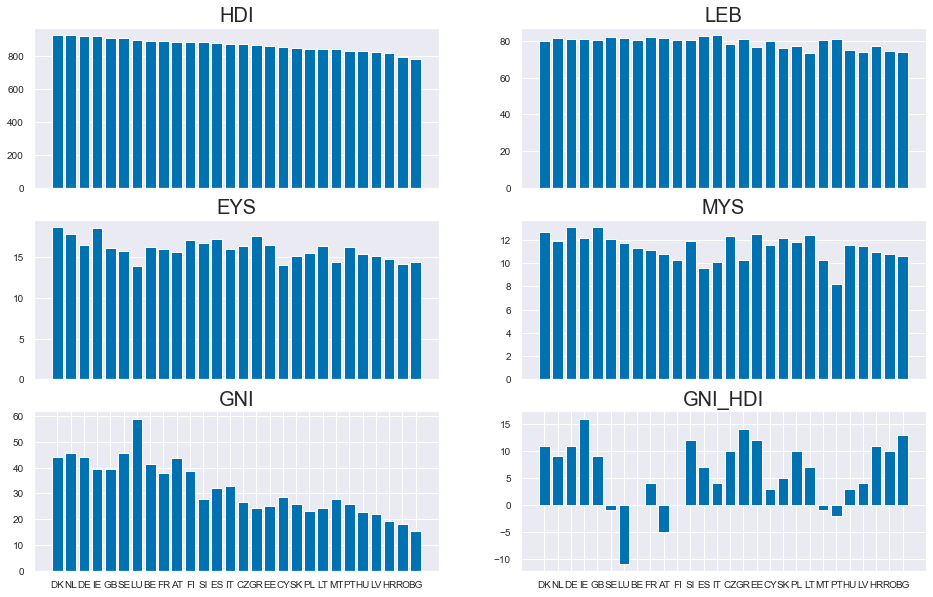

In [62]:
country = idh["COUNTRY"].values

fig, axs = plt.subplots(3,2)

values = idh.drop("COUNTRY",1)

i = 0
j = 0
for v in values.columns:
    sample = values[v]
    
    axs[j,i].bar(country,sample.values)
    axs[j,i].tick_params(axis='both', which='major', labelsize=10)
    
    axs[j,i].set_title(v)
    
    axs[j,i].get_xaxis().set_visible(False)
    
    if j == 2:
        axs[j,i].get_xaxis().set_visible(True)
    
    
    i+= 1
    
    if i == 2:
        i = 0
        j += 1
    
plt.show()

In [63]:
query = """
Select *
FROM Religion NATURAL JOIN Country
"""

religion = pd.read_sql_query(query,conn)
religion = religion.drop("COUNTRYCODE",1)
religion

,Catholic,Orthodox,Protestant,OtherChristian,TotalChristians,NonBeliever,Atheist,Muslim,COUNTRY
0,21.9,1.9,17.8,6.2,47.8,39.6,9.2,1.4,NL
1,27.1,0.2,1.0,3.2,31.5,38.6,25.8,0.0,CZ
2,1.6,0.9,36.5,8.6,47.6,31.0,19.0,1.2,SE
3,60.3,1.1,5.1,8.1,74.6,18.5,2.7,0.3,HU
4,47.8,0.6,1.8,4.1,54.3,17.6,22.8,3.3,FR
5,26.2,24.0,16.6,9.9,76.7,17.3,4.7,1.2,LV
6,52.9,1.6,2.1,4.1,60.7,17.1,14.9,5.2,BE
7,64.2,1.4,0.8,2.2,68.6,17.0,10.9,0.6,ES
8,2.8,23.2,9.0,23.6,58.6,16.6,22.2,0.2,EE
9,66.5,2.2,7.2,1.9,77.8,15.4,4.1,1.5,AT


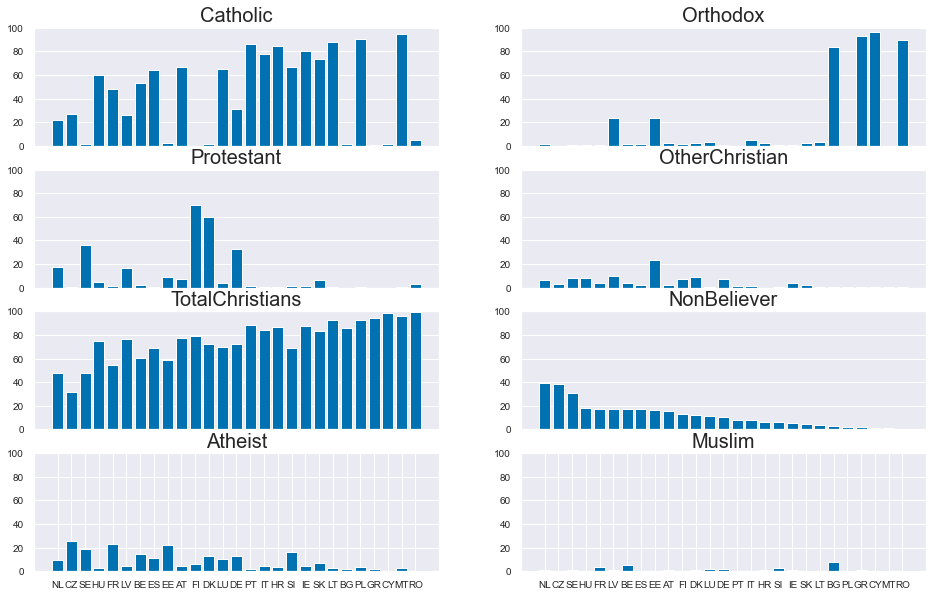

In [64]:
country = religion["COUNTRY"].values

fig, axs = plt.subplots(4,2)

values = religion.drop("COUNTRY",1)

i = 0
j = 0
for v in values.columns:
    sample = values[v]
    
    axs[j,i].bar(country,sample.values)
    axs[j,i].tick_params(axis='both', which='major', labelsize=10)
    
    axs[j,i].set_title(v)
    
    axs[j,i].get_xaxis().set_visible(False)
    
    if j == 3:
        axs[j,i].get_xaxis().set_visible(True)
    
    axs[j,i].set_ylim(0,100)
    i+= 1
    
    if i == 2:
        i = 0
        j += 1
    
plt.show()

In [65]:
query = """
Select *
FROM Culture NATURAL JOIN Country
"""

culture = pd.read_sql_query(query,conn)
culture = culture.drop("COUNTRYCODE",1)
culture = culture.dropna()
culture

,pdi,idv,mas,uai,ltowvs,ivr,COUNTRY
0,11.0,55.0,79.0,70.0,60.0,63,AT
1,65.0,75.0,54.0,94.0,82.0,57,BE
2,70.0,30.0,40.0,85.0,69.0,16,BG
3,73.0,33.0,40.0,80.0,58.0,33,HR
5,57.0,58.0,57.0,74.0,70.0,29,CZ
6,18.0,74.0,16.0,23.0,35.0,70,DK
7,40.0,60.0,30.0,60.0,82.0,16,EE
8,33.0,63.0,26.0,59.0,38.0,57,FI
9,68.0,71.0,43.0,86.0,63.0,48,FR
10,35.0,67.0,66.0,65.0,83.0,40,DE


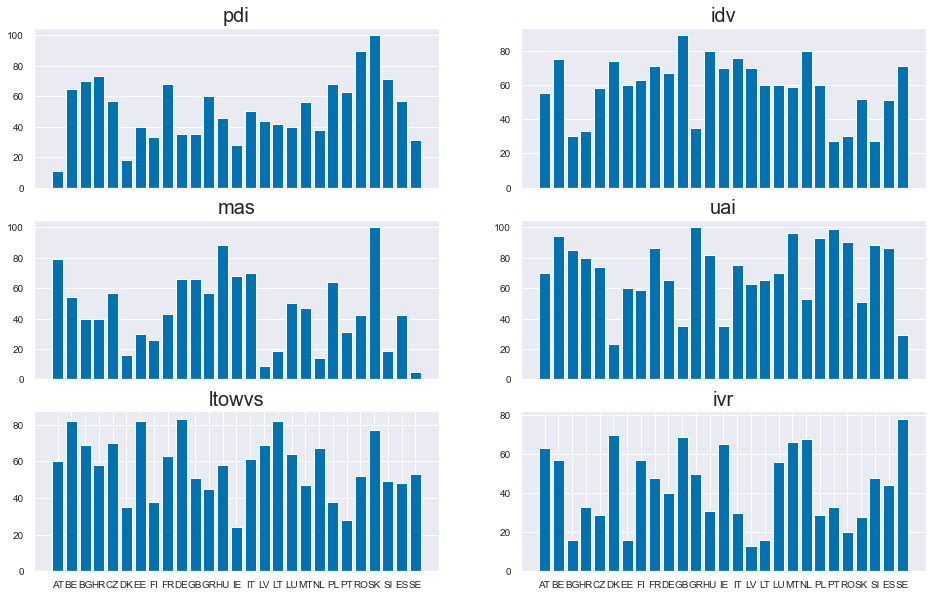

In [66]:
country = culture["COUNTRY"].values

fig, axs = plt.subplots(3,2)

values = culture.drop("COUNTRY",1)

i = 0
j = 0
for v in values.columns:
    sample = values[v]
    
    axs[j,i].bar(country,sample.values)
    axs[j,i].tick_params(axis='both', which='major', labelsize=10)
    
    axs[j,i].set_title(v)
    
    axs[j,i].get_xaxis().set_visible(False)
    
    if j == 2:
        axs[j,i].get_xaxis().set_visible(True)

    i+= 1
    
    if i == 2:
        i = 0
        j += 1
    
plt.show()

In [77]:
query = """
Select *
FROM Pesos NATURAL JOIN Country NATURAL JOIN ANSWERS NATURAL JOIN SIZE
"""

values = pd.read_sql_query(query,conn)
values["TAMANHO"] = values["VALOR"] * values["PERCENTAGE"] / 100
values = values.dropna()
values

,QC,ANSWER,VALUE,COUNTRYCODE,COUNTRY,SUBSET,PERCENTAGE,NOTES,TIPO,VALOR,TAMANHO
0,e1,Yes,0.0,0,AT,LESBIAN,33,NULL,BIM,217,71.61
1,e1,Yes,0.0,0,AT,LESBIAN,33,NULL,BIW,164,54.12
2,e1,Yes,0.0,0,AT,LESBIAN,33,NULL,GAY,1558,514.14
3,e1,Yes,0.0,0,AT,LESBIAN,33,NULL,LESBIAN,437,144.21
4,e1,Yes,0.0,0,AT,LESBIAN,33,NULL,TRANS,167,55.11
...,...,...,...,...,...,...,...,...,...,...,...
23535,fb2_6,Don`t know,0.5,11,GB,TRANS,3,[0],BIM,294,8.82
23536,fb2_6,Don`t know,0.5,11,GB,TRANS,3,[0],BIW,572,17.16
23537,fb2_6,Don`t know,0.5,11,GB,TRANS,3,[0],GAY,3795,113.85
23538,fb2_6,Don`t know,0.5,11,GB,TRANS,3,[0],LESBIAN,1285,38.55


In [84]:
boot_d = pd.DataFrame(columns= ["COUNTRY","VALUE"])
for c in values["COUNTRYCODE"].unique():
    sample = values[values["COUNTRYCODE"] == c]
    
    b = gerarB([c],sample,n_size=100)
    
    for u in b:
        boot_d = boot_d.append({"COUNTRY": sample["COUNTRY"].values[0], "VALUE" : u},ignore_index=True)
    
boot_d

,COUNTRY,VALUE
0,AT,0.352367
1,AT,0.353033
2,AT,0.353176
3,AT,0.350913
4,AT,0.352673
...,...,...
2795,GB,0.342083
2796,GB,0.341878
2797,GB,0.342740
2798,GB,0.340740


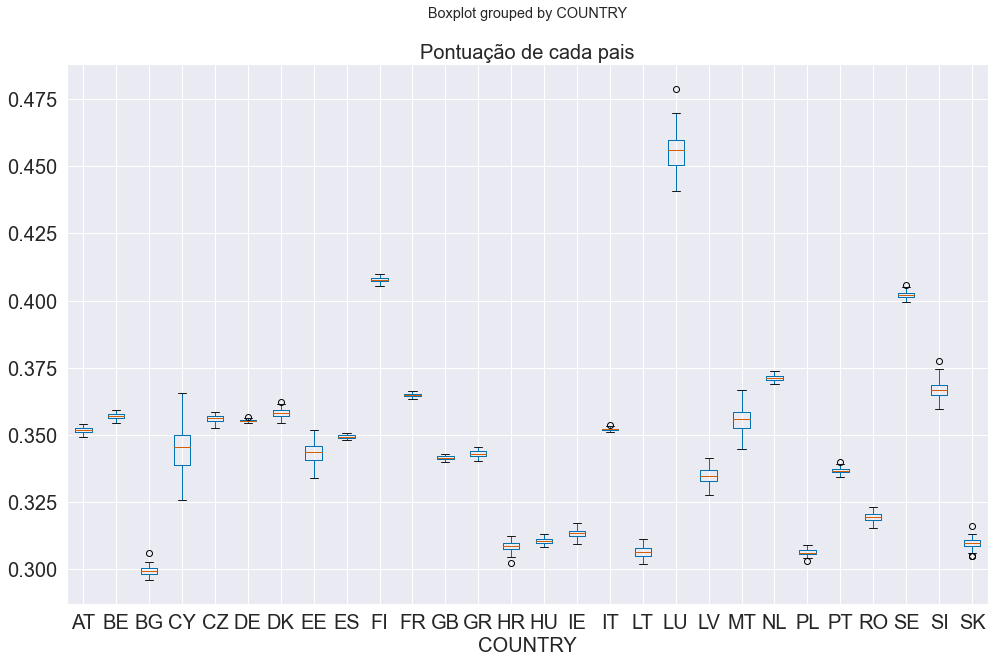

In [102]:
boot_d.boxplot(column="VALUE",by="COUNTRY")
plt.title("Pontuação de cada pais")
plt.show()

In [ ]:
f.close()
conn.close()